### Patrick Horlaville (260931235) - Problem Set 1 - PHYS 512 : Computational Physics with Applications

Prof: Jon Sievers. TAs: Marcus Merryfield, Rigel Zifkin

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1b)

A 64-bit machine's floating point format typically is

In [2]:
e_m = 2**(-52)

In [7]:
def deriv(funct, x, delta):

    p1 = 8*(funct(x + delta) - funct(x - delta))
    p2 = funct(x + 2*delta) - funct(x - 2*delta)
    
    deriv = (1/(12*delta))*(p1 - p2)
    
    return deriv

In [3]:
def funct1(x):
    return np.exp(x)

In [5]:
x_t = 10
e_f = e_m
delta_1a = (e_f)**(1/5)

In [8]:
deriv_est_1a = deriv(funct1, x_t, delta_1a)

In [16]:
frac_err_1a = (deriv_est_1a - funct1(x_t))/funct1(x_t)

In [17]:
print('Our estimate for the derivative at x =', x_t, ' for f(x) = exp(x) is', deriv_est_1a, ', which results in a fractional error of', frac_err_1a)

Our estimate for the derivative at x = 10  for f(x) = exp(x) is 22026.465794831664 , which results in a fractional error of 1.132529426763935e-12


In [12]:
def funct2(x):
    return np.exp(0.01*x)

In [13]:
x_t = 10
delta_1b = 100*(e_m**(1/5))

In [18]:
deriv_est_1b = deriv(funct2, x_t, delta_1b)

In [20]:
frac_err_1b = (np.absolute(deriv_est_1b - 0.01*funct2(x_t)))/(0.01*funct2(x_t))

In [21]:
print('Our estimate for the derivative at x =', x_t, ' for f(x) = exp(0.01x) is', deriv_est_1b, ', which results in a fractional error of', frac_err_1b)

Our estimate for the derivative at x = 10  for f(x) = exp(0.01x) is 0.011051709180755005 , which results in a fractional error of 1.332626661646827e-13


2)

In [23]:
x_t = 10
d_approx = x_t*(e_m**(1/3))

In [24]:
d_approx

6.055454452393343e-05

In [25]:
def third_deriv(funct, x, d):
    
    p1 = funct(x + 2*d) - funct(x - 2*d)
    p2 = funct(x + d) - funct(x - d)
    
    third_d = (p1 - 2*p2)/(2*(d**3))
    
    return third_d

In [58]:
def est_delta(funct, x, d_approx, n):
    
    ds = [d_approx for i in range(n)]
    third_d = [0 for i in range(n)]
    for i in range(n):
        if i == 0:
            third_d[i] = third_deriv(funct, x, d_approx)
        else:
            third_d[i] = third_deriv(funct, x, ds[i-1])
            ds[i] = ((e_m*funct(x))/third_d[i])**(1/3)
    '''    
    if ds[-1] >:
         opti_delta = ds[-1]
    else:
        good = ds < e_m
        ac_ds = ds[good]
        opti_delta = ac_ds[-1]
     '''       
    
    opti_delta = ds[-1]
    
    return opti_delta

In [59]:
est_delta(funct1, x_t, d_approx, 10)

<ipython-input-58-5493d338970d>:10: RuntimeWarning: divide by zero encountered in double_scalars
  ds[i] = ((e_m*funct(x))/third_d[i])**(1/3)
<ipython-input-25-6f3cf05b10da>:6: RuntimeWarning: invalid value encountered in double_scalars
  third_d = (p1 - 2*p2)/(2*(d**3))


nan

In [60]:
third_deriv(funct1, x_t, d_approx)

22028.28799999996

In [62]:
ds_t = [d_approx for i in range(10)]
third_d_t = [0 for i in range(10)]

for i in range(10):
    if i == 0:
        third_d_t[i] = third_deriv(funct1, x_t, d_approx)
    else:
        third_d_t[i] = third_deriv(funct1, x_t, ds_t[i-1])
            if third_d_t[i] == 0:
                ds_t[i] = ((e_m*funct1(x_t))/third_d_t[i-1])**(1/3)
                opti_delta = ds_t[i]
            else:
                ds_t[i] = ((e_m*funct1(x_t))/third_d_t[i])**(1/3)

<ipython-input-62-faf76de8dd65>:8: RuntimeWarning: divide by zero encountered in double_scalars
  ds_t[i] = ((e_m*funct1(x_t))/third_d_t[i])**(1/3)
<ipython-input-25-6f3cf05b10da>:6: RuntimeWarning: invalid value encountered in double_scalars
  third_d = (p1 - 2*p2)/(2*(d**3))


In [152]:
def ndiff_t(funct, x, dx):
    
    deriv = (funct(x + dx) - funct(x - dx))/(2*dx)
    
    return deriv

In [426]:
ndiff_t(funct1, 10, est_delta(funct1, 10, d_approx, 10)) - np.exp(10)

6.04883098276332e-07

In [156]:
ndiff_t(funct1, 10, est_delta(funct1, 10)) - np.exp(10)

1.4328761608339846e-06

In [159]:
ndiff_t(funct1, 10, d_approx) - np.exp(10)

1.3333683455130085e-05

In [446]:
def ndiff(funct, x, full = False):
    
    n = 10
    d_approx = x*(e_m**(1/3))
    third_d = third_deriv(funct, x, d_approx)
    
    if third_d < e_m:
        delta = x*(e_m**(1/3))
        deriv = (funct(x + delta) - funct(x - delta))/(2*delta)
        err = e_m**(2/3)
    
    if third_d > e_m:
        delta = est_delta(funct, x, d_approx, n)
        deriv = (funct(x + delta) - funct(x - delta))/(2*delta)
        err = ((e_m**2)*((funct(x))**2)*(third_deriv(funct, x, delta)))**(1/3)
    
    if full:
        return deriv, delta, err
    else:
        return deriv

3)

In [64]:
data = np.loadtxt("lakeshore.txt")

In [65]:
temperature, voltage, dVdT = np.transpose(data)

Text(0, 0.5, 'Temperature')

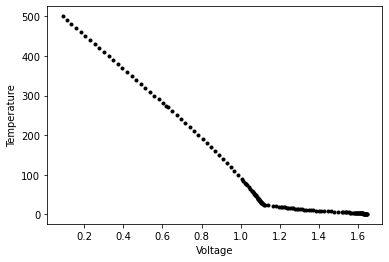

In [67]:
plt.plot(voltage, temperature, '.k')
plt.xlabel('Voltage')
plt.ylabel('Temperature')

In [68]:
def lakeshore(V, data):
    
    temp, volt, dVdT = np.transpose(data)
    
    volt = volt[::-1]
    temp = temp[::-1]
    
    if type(V) == type(np.array([])):
        pass
    else: 
        V = np.array([V])
        
    t_interp = np.zeros(len(V))
    
    for i in range(len(V)):    
        ind = np.max(np.where(V[i] >= volt)[0])
        v_use = volt[ind - 1:ind + 3]
        t_use = temp[ind - 1:ind + 3]
        pars = np.polyfit(v_use, t_use, 3)
        pred = np.polyval(pars, V[i])
        t_interp[i] = pred
    
    
    return t_interp

<ipython-input-70-807ab46fcfe8>:2: RankWarning: Polyfit may be poorly conditioned
  t_try = lakeshore(v_try, data)


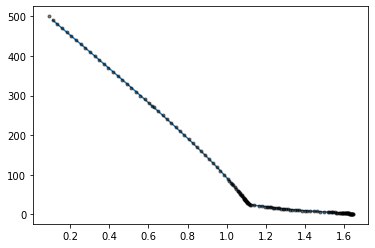

In [70]:
v_try = np.linspace(voltage[1], voltage[-2])
t_try = lakeshore(v_try, data)
plt.plot(v_try, t_try)
plt.plot(voltage, temperature, '.k', alpha = 0.5)

4)

In [79]:
from scipy import interpolate

In [72]:
x_true = np.linspace(-np.pi/2, np.pi/2, 10)
y_true = np.cos(x_true)

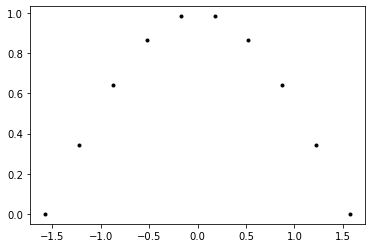

In [73]:
plt.plot(x_true, y_true, '.k')

Polynomial interpolation (here, a cubic polynomial fit)

In [71]:
def cubic_interp(x_interp, x, y):
    
    if type(x_interp) == type(np.array([])):
        pass
    else: 
        x_interp = np.array([x_interp])
     
    y_interp = np.zeros(len(x_interp))
    
    for i in range(len(x_interp)):    
        ind = np.max(np.where(x_interp[i] >= x)[0])
        if ind == 0:
            x_use = x[0:ind + 3]
            y_use = y[0:ind + 3]
        else:    
            x_use = x[ind - 1:ind + 3]
            y_use = y[ind - 1:ind + 3]
        
        pars = np.polyfit(x_use, y_use, 3)
        pred = np.polyval(pars, x_interp[i])
        y_interp[i] = pred
    
    
    return y_interp

In [93]:
x_try = np.linspace(-np.pi/2, np.pi/2, 20)
y_try = cubic_interp(x_try, x_true, y_true)

<ipython-input-93-de97d3beed3c>:2: RankWarning: Polyfit may be poorly conditioned
  y_try = cubic_interp(x_try, x_true, y_true)
<ipython-input-93-de97d3beed3c>:2: RankWarning: Polyfit may be poorly conditioned
  y_try = cubic_interp(x_try, x_true, y_true)
<ipython-input-93-de97d3beed3c>:2: RankWarning: Polyfit may be poorly conditioned
  y_try = cubic_interp(x_try, x_true, y_true)
<ipython-input-93-de97d3beed3c>:2: RankWarning: Polyfit may be poorly conditioned
  y_try = cubic_interp(x_try, x_true, y_true)
<ipython-input-93-de97d3beed3c>:2: RankWarning: Polyfit may be poorly conditioned
  y_try = cubic_interp(x_try, x_true, y_true)
<ipython-input-93-de97d3beed3c>:2: RankWarning: Polyfit may be poorly conditioned
  y_try = cubic_interp(x_try, x_true, y_true)


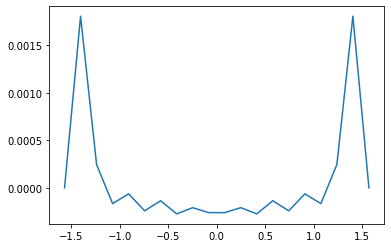

In [94]:
plt.plot(x_try, y_try - np.cos(x_try))

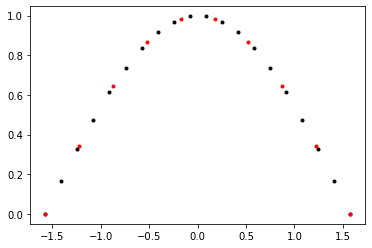

In [95]:
plt.plot(x_try, y_try, '.k')
plt.plot(x_true, y_true, '.r')

Cubic spline fit

In [97]:
spln = interpolate.splrep(x_true, y_true)

In [98]:
y_try_spl = interpolate.splev(x_try, spln)

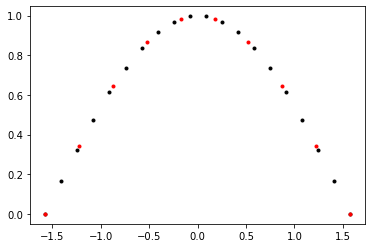

In [99]:
plt.plot(x_try, y_try_spl, '.k')
plt.plot(x_true, y_true, '.r')

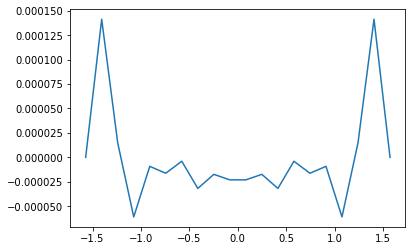

In [104]:
plt.plot(x_try, y_try_spl - np.cos(x_try))

Rational function